In [2]:
import pandas as pd
import numpy as np
# import os
# import glob
# import sqlalchemy as db
# from sqlalchemy.ext.automap import automap_base
# from sqlalchemy.orm import Session
# from sqlalchemy import create_engine, func
import requests
import seaborn as sns

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
bitcoin_df=pd.read_csv('/content/drive/MyDrive/project3/data/bitcoin_cleaned.csv')

In [5]:
doge_df=pd.read_csv('/content/drive/MyDrive/project3/data/doge_cleaned.csv')

In [6]:
tether_df=pd.read_csv('/content/drive/MyDrive/project3/data/tethera_cleaned.csv')

In [7]:
ethereum_df=pd.read_csv('/content/drive/MyDrive/project3/data/ethereum_cleaned.csv')

In [8]:
# cleasing data
# shiba_df["Date"] = pd.to_datetime(shiba_df["Date"]).dt.normalize()
# bitcoin_df["Date"] = pd.to_datetime(bitcoin_df["Date"]).dt.normalize()
# tether_df["Date"] = pd.to_datetime(tether_df["Date"]).dt.normalize()
# doge_df["Date"] = pd.to_datetime(doge_df["Date"]).dt.normalize()
# ethereum_df["Date"] = pd.to_datetime(ethereum_df["Date"]).dt.normalize()
def datetype(df):
  df['Date']=pd.to_datetime(df['Date']).dt.normalize()


datetype(bitcoin_df)
datetype(tether_df)
datetype(doge_df)
datetype(ethereum_df)


In [9]:
# expand the features of date to get year, month and day_of_week columns to add more features
bitcoin_df['Year']=bitcoin_df['Date'].dt.year
bitcoin_df['Month']=bitcoin_df['Date'].dt.month
bitcoin_df['Day_of_Week']=bitcoin_df['Date'].dt.dayofweek

doge_df['Year']=doge_df['Date'].dt.year
doge_df['Month']=doge_df['Date'].dt.month
doge_df['Day_of_Week']=doge_df['Date'].dt.dayofweek

tether_df['Year']=tether_df['Date'].dt.year
tether_df['Month']=tether_df['Date'].dt.month
tether_df['Day_of_Week']=tether_df['Date'].dt.dayofweek

ethereum_df['Year']=ethereum_df['Date'].dt.year
ethereum_df['Month']=ethereum_df['Date'].dt.month
ethereum_df['Day_of_Week']=ethereum_df['Date'].dt.dayofweek

In [10]:
pd.set_option('display.precision',8)



In [11]:
concat_df=pd.concat([bitcoin_df,ethereum_df,tether_df,doge_df]).set_index('Date').drop('Unnamed: 0',1)

In [12]:
concat_df

,Name,Close,Marketcap,Year,Month,Day_of_Week
Date,,,,,,
2013-04-29,Bitcoin,144.53999329,1.60376886e+09,2013,4,0
2013-04-30,Bitcoin,139.00000000,1.54281312e+09,2013,4,1
2013-05-01,Bitcoin,116.98999786,1.29895459e+09,2013,5,2
2013-05-02,Bitcoin,105.20999908,1.16851750e+09,2013,5,3
2013-05-03,Bitcoin,97.75000000,1.08599517e+09,2013,5,4
...,...,...,...,...,...,...
2021-02-07,Dogecoin,0.24526382,3.19492533e+10,2021,2,6
2021-03-07,Dogecoin,0.24641099,3.21049089e+10,2021,3,6
2021-04-07,Dogecoin,0.24648301,3.21176658e+10,2021,4,2


In [14]:
coin_name_list=concat_df['Name'].unique()

Bitcoin
Ethereum
Tether
Dogecoin


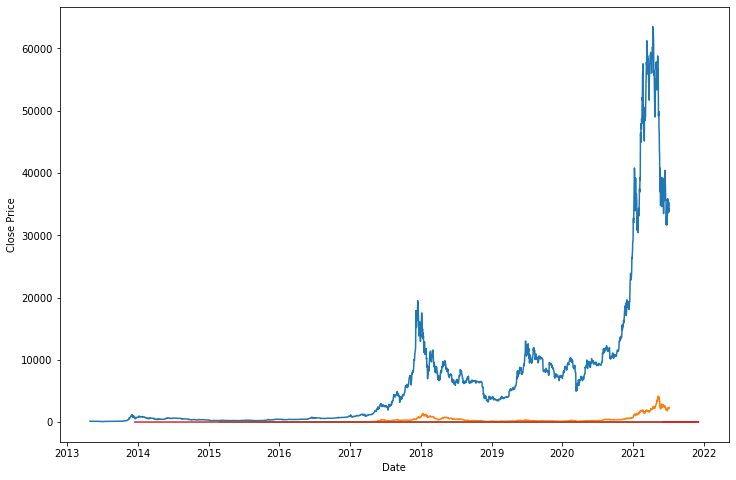

In [15]:
#@title Default title text
# make a plot to see price change first
from matplotlib import pyplot as plt

plt.figure(figsize=(12,8))
plt.xlabel('Date')
plt.ylabel('Close Price')
for name in coin_name_list:
  print(name)
  name=str(name)
  plt.plot(concat_df.loc[concat_df['Name'] == name,['Close']])
  

In [17]:
# define functions to help select the right df/data and split the test/traing data accordingly

# for bitcoin data

df=concat_df.loc[concat_df['Name'] == 'Bitcoin',['Close']]
# df=df.query('index >= 20180101')
print(df.shape)
split_row = len(df) - int(0.2 * len(df))
train = df.iloc[:split_row].values
test = df.iloc[split_row:].values
print(train.shape, test.shape)


(2991, 1)
(2393, 1) (598, 1)


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)
scaled_data

array([[0.00119979],
       [0.00111246],
       [0.00076549],
       ...,
       [0.5552035 ],
       [0.53089867],
       [0.53861036]])

In [19]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])


x_train= np.array(x_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
y_train=np.array(y_train)
y_train=y_train.reshape(-1,1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
model.fit(x_train, y_train, epochs=40, batch_size=32, verbose=1)

Epoch 1/40
73/73 [==============================] - 7s 54ms/step - loss: 4.7438e-04
Epoch 2/40
73/73 [==============================] - 4s 55ms/step - loss: 1.3610e-04
Epoch 3/40
73/73 [==============================] - 4s 55ms/step - loss: 1.2061e-04
Epoch 4/40
73/73 [==============================] - 4s 54ms/step - loss: 1.0184e-04
Epoch 5/40
73/73 [==============================] - 4s 55ms/step - loss: 9.7031e-05
Epoch 6/40
73/73 [==============================] - 4s 55ms/step - loss: 9.9727e-05
Epoch 7/40
73/73 [==============================] - 4s 55ms/step - loss: 7.9120e-05
Epoch 8/40
73/73 [==============================] - 4s 56ms/step - loss: 7.7210e-05
Epoch 9/40
73/73 [==============================] - 4s 55ms/step - loss: 8.1382e-05
Epoch 10/40
73/73 [==============================] - 4s 56ms/step - loss: 7.0586e-05
Epoch 11/40
73/73 [==============================] - 4s 55ms/step - loss: 7.4288e-05
Epoch 12/40
73/73 [==============================] - 4s 56ms/step - loss: 

In [ ]:
model.save("/content/drive/MyDrive/project3/static/python/final_model.h5")

In [20]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/project3/static/python/final_model.h5")

In [21]:
inputs = df[len(df) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [22]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [23]:
closing_price = model.predict(X_test)
closing_price_transformed = scaler.inverse_transform(closing_price)



In [24]:
rms=np.sqrt(np.mean(np.power((test-closing_price_transformed),2)))
rms

3339.0180998483593

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

preds = closing_price_transformed.squeeze()
MAE=mean_absolute_error(preds, test)

MSE = mean_squared_error(test, closing_price)
print(f'MSE score is {MSE}.')
print(f'MAE score is {MAE}.')

MSE score is 771049123.1421676.
MAE score is 1986.0678676811895.


In [52]:
split_row = len(df) - int(0.2 * len(df))
train = df.iloc[:split_row]
test = df.iloc[split_row:]

In [53]:
test['Predictions']=closing_price_transformed



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
test

,Close,Predictions
Date,,
2019-11-17,8577.97578160,8317.24218750
2019-11-18,8309.28598342,8314.31250000
2019-11-19,8206.14591807,8203.85058594
2019-11-20,8027.26824331,8071.49072266
2019-11-21,7642.74994484,7913.37890625
...,...,...
2021-07-02,33897.04858963,31402.99414062
2021-07-03,34668.54840182,30895.94335938
2021-07-04,35287.77976616,31174.54882812


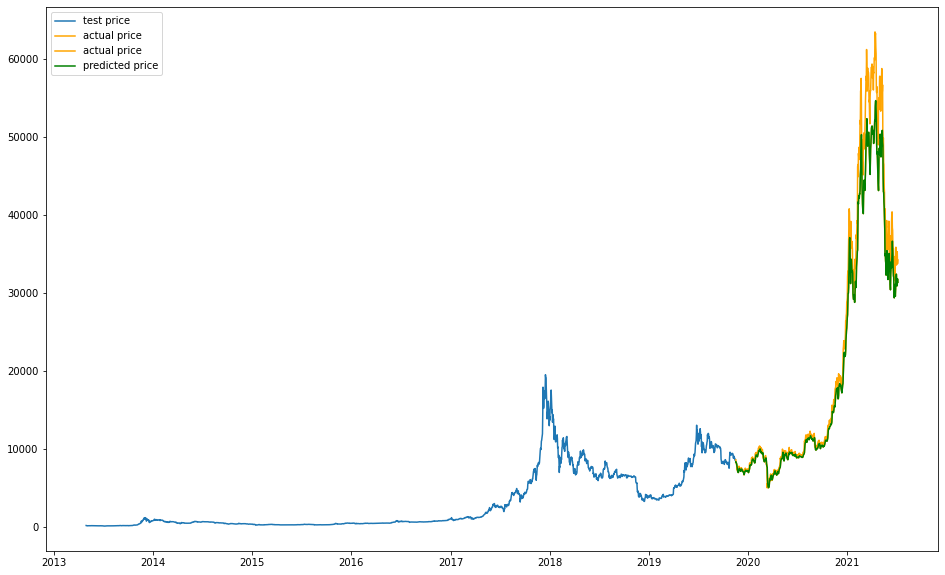

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.plot(train['Close'],label='test price')
plt.plot(test,c='orange',label='actual price')
plt.plot(test['Predictions'],c='green',label='predicted price')
plt.legend()

,Close,Predictions
Date,,
2019-11-17,8577.97578160,8317.24218750
2019-11-18,8309.28598342,8314.31250000
2019-11-19,8206.14591807,8203.85058594
2019-11-20,8027.26824331,8071.49072266
2019-11-21,7642.74994484,7913.37890625
...,...,...
2021-07-02,33897.04858963,31402.99414062
2021-07-03,34668.54840182,30895.94335938
2021-07-04,35287.77976616,31174.54882812


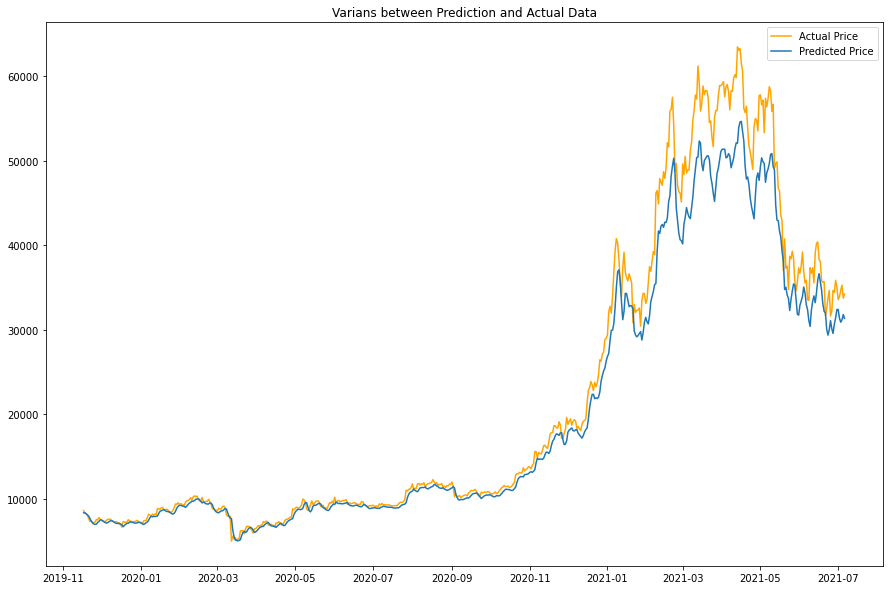

In [56]:
plt.figure(figsize=(15,10))
plt.plot(test['Close'],c='orange',label='Actual Price')
plt.plot(test['Predictions'],label='Predicted Price')
plt.title('Varians between Prediction and Actual Data')
plt.legend()


In [57]:
len(test)

598

In [59]:
# prediction price in 30 days
len(test)
# test=test.drop('Predictions',1)
test=np.array(test)
# x_input=scaler.fit_transform(test[len(test)-60:]).reshape(1,-1)

x_input.shape


(1, 120)

In [44]:
x_input

array([[1.        , 0.94591204, 0.97896416, 0.99576524, 0.89163003,
        1.        , 0.92272682, 0.92881931, 0.64465717, 0.91045858,
        0.66547944, 0.71744541, 0.67152898, 0.63342911, 0.55666675,
        0.63005235, 0.54547157, 0.57268772, 0.43803774, 0.53946763,
        0.41491654, 0.46104747, 0.19747704, 0.40992644, 0.33663254,
        0.25158994, 0.20860309, 0.26362879, 0.21714098, 0.22035417,
        0.11532077, 0.20315717, 0.26018551, 0.1356132 , 0.24900408,
        0.1961822 , 0.28183827, 0.24193707, 0.25028306, 0.28209434,
        0.14944515, 0.27487903, 0.10963294, 0.19294986, 0.14872818,
        0.11560932, 0.20963979, 0.10957691, 0.18578905, 0.1648941 ,
        0.21855998, 0.1877897 , 0.27869348, 0.21388367, 0.19350019,
        0.26499199, 0.14408375, 0.23263789, 0.1555105 , 0.16807666,
        0.07078437, 0.14036053, 0.06754222, 0.08046478, 0.21009138,
        0.04819534, 0.18643967, 0.13687731, 0.20969669, 0.18636601,
        0.14410431, 0.21605782, 0.27461098, 0.17

In [45]:
temp_input=list(x_input)
# temp_input=temp_input[0].tolist()

In [46]:
from numpy import array
lst_output=[]
n_steps=60
i=0
while(i<30):
  if(len(temp_input)>60):
    x_input=np.array(temp_input[1:])
    print('{} day input {}'.format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=1)
    print('{} day input {}'.format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i+=1

  else:
      x_input=x_input.reshape((1,n_steps,1))
      yhat=model.predict(x_input,verbose=1)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      i+=1



ValueError: ignored

In [ ]:
day_new=np.arange(1,61)
day_pred=np.arange(61,91)

In [ ]:
df=scaler.fit_transform(np.array(df).reshape(-1,1))

TypeError: ignored

In [ ]:
last_60_y=scaler.inverse_transform(df[2931:]).tolist()

In [ ]:
last_60_y

[[56791.14098001892],
 [56546.41386896868],
 [55530.38481910244],
 [55892.15920677389],
 [52657.148420067264],
 [52899.390855578305],
 [52969.770097797555],
 [51633.484237441626],
 [51503.241645946764],
 [50253.37636549463],
 [49984.38859921568],
 [47454.737860246605],
 [49073.6471420175],
 [47584.17625091596],
 [47683.504545416086],
 [46498.94708577861],
 [48184.27661773128],
 [48054.19389179899],
 [48436.180789597194],
 [48069.07327271789],
 [46895.94378900049],
 [46432.77590457313],
 [46887.6027007832],
 [47596.23703889959],
 [47318.76192793041],
 [47700.012891666054],
 [48399.59487144549],
 [47408.47190614038],
 [46833.570301939275],
 [46966.50697252928],
 [45980.81882081151],
 [45943.1003111176],
 [47601.490712611965],
 [47326.33117067105],
 [47596.89904217608],
 [46833.80944593341],
 [48352.09985846849],
 [48832.003109471036],
 [48912.42449830914],
 [48030.57140168384],
 [47904.85498910051],
 [46934.33135311868],
 [46860.93993752875],
 [46896.23930365595],
 [45173.99139977831],
 

In [ ]:
predicted_30=scaler.inverse_transform(lst_output).tolist()

In [ ]:
predicted_30

[[34180.014218868986],
 [34108.01886104703],
 [34062.687191173565],
 [34027.671164100735],
 [33997.94836566115],
 [33971.45874381178],
 [33947.06722566432],
 [33924.047591260976],
 [33901.92480207306],
 [33880.40314813449],
 [33859.3144330169],
 [33838.57870775617],
 [33818.17370808379],
 [33798.10833970717],
 [33778.408712541175],
 [33759.104579744606],
 [33740.22346804943],
 [33721.78642730949],
 [33703.80762569564],
 [33686.293540086],
 [33669.243968078124],
 [33652.654254415866],
 [33636.514886184515],
 [33620.814124042496],
 [33605.53901423359],
 [33590.67538858695],
 [33576.209281334144],
 [33562.12652430432],
 [33548.41375893638],
 [33535.05823387655]]

In [ ]:
df.shape

(2991, 1)

In [ ]:
predict_df=df.tolist()
predict_df.extend(lst_output)

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(day_new,scaler.inverse_transform(df[2931:]),c='orange')
plt.plot(day_pred,scaler.inverse_transform(lst_output),c='purple')

TypeError: ignored

<Figure size 1080x576 with 0 Axes>

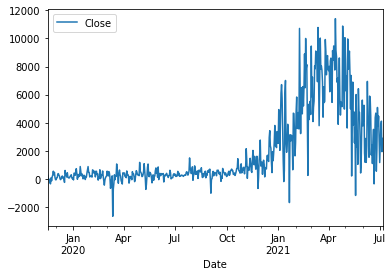

In [ ]:
# residuals

residuals= test-closing_price_transformed
residuals = pd.DataFrame(residuals).drop('Predictions',1)
# plot residuals
residuals.plot()
plt.show()

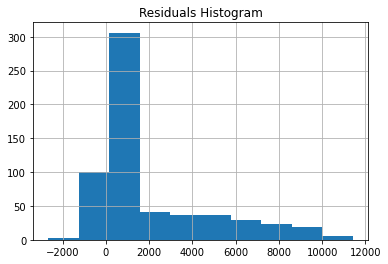

In [ ]:
residuals.hist()
plt.title('Residuals Histogram')
plt.show()

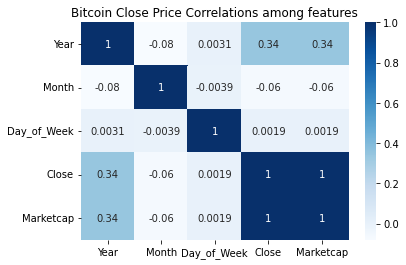

In [ ]:
# check correlations between cols
corrs=bitcoin_df.corr()['Close'].abs()
columns=corrs[corrs>.001].index
corrs=corrs.filter(columns)
corrs

# plot heatmap
ax = plt.axes()
sns.heatmap(doge_df[['Year',	'Month','Day_of_Week','Close','Marketcap']].corr(), annot=True,cmap="Blues",ax = ax)

ax.set_title('Bitcoin Close Price Correlations among features')
plt.show()
# heatmap = sns.heatmap(doge_df[['Year',	'Month','Day_of_Week','Close','Marketcap']].corr(),cmap="Blues")

In [ ]:
# check corrs between coins and close price by making a new df
data={
    'Bitcoin(Close unit price)':bitcoin_df['Close'],
    'Tether(Close unit price)':tether_df['Close'],
    'Doge(Close unit price)':doge_df['Close'],
    'Ethereum(Close unit price)':ethereum_df['Close']
}

corr_df=pd.DataFrame(data)
corr_df=corr_df.dropna()
corr_df


,Bitcoin(Close unit price),Tether(Close unit price),Doge(Close unit price),Ethereum(Close unit price)
0,144.53999329,1.20573997,0.00020473,0.75332499
1,139.00000000,0.60650200,0.00026854,0.70189703
2,116.98999786,0.60622901,0.00036163,0.70844799
3,105.20999908,1.00000000,0.00116249,1.06786001
4,97.75000000,1.00000000,0.00070387,1.21744001
...,...,...,...,...
2155,4022.16828220,0.99997087,0.00277499,2150.04036404
2156,3963.07065416,1.00108122,0.00271483,2226.11428196
2157,3985.08080287,1.00176440,0.00272501,2321.72411157
2158,4087.06622992,1.00154320,0.00269754,2198.58246387


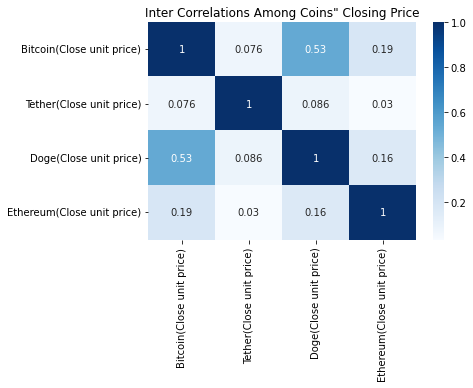

In [ ]:
# plot heatmap for corrs among cins
ax = plt.axes()
plt.title('Inter Correlations Among Coins" Closing Price')
heatmap = sns.heatmap(corr_df.corr(),cmap="Blues",annot=True,ax=ax)
plt.show()